In [342]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

### firstly, let´s check the dataframe structure

In [160]:
df= pd.read_csv("covid-19-uk-historical-data.csv")
df

,Unnamed: 0,date,country,areacode,area,totalcases
0,0,2020-01-30,England,E06000014,York,1.0
1,1,2020-02-03,England,E10000002,Buckinghamshire,1.0
2,2,2020-02-03,Wales,W11000028,Aneurin Bevan,0.0
3,3,2020-02-03,Wales,W11000023,Betsi Cadwaladr,0.0
4,4,2020-02-03,Wales,W11000029,Cardiff and Vale,0.0
...,...,...,...,...,...,...
23293,23293,2020-07-29,Scotland,S08000024,Lothian,3192.0
23294,23294,2020-07-29,Scotland,S08000025,Orkney,9.0
23295,23295,2020-07-29,Scotland,S08000026,Shetland,54.0
23296,23296,2020-07-29,Scotland,S08000030,Tayside,1785.0


In [161]:
date_lst=[]

for date in df.date:

    date=datetime.strptime(date, "%Y-%m-%d")
    date_lst.append(date)
df["datetime"]=date_lst



def find_days(df):
    days_lst=[0]
    m=0
    n=0
    for days in df["datetime"]:

            m+=1

            if m<df.shape[0]:

                delta=df["datetime"][m]-df["datetime"][n]
                n+=1

                #print(delta)
                #print(delta.days)
                days_lst.append(delta.days)
            else:
                break
    df["days"] = days_lst


find_days(df)
    
    

In [162]:
df.days= df.datetime - df.datetime[0]   # simplest way to find intervals! No function required, no for cycles no df.apply() etc




In [163]:
time_range= df.datetime[df.shape[0]-1]-df.datetime[0]   #This trick is amazing to avoid having a Series as a result. Not sure why it works

"this will be used for plotting later: "

tot_days= time_range.days

lockdown was imposed on the 23rd of March 2020, 23-03-2020

In [361]:
df[df["date"]=="2020-04-09"].head(1)

,Unnamed: 0,date,country,areacode,area,totalcases,datetime,days
5525,5525,2020-04-09,England,E09000002,Barking and Dagenham,337.0,2020-04-09,70 days


Lockdown began on day 52!

<ipython-input-363-60769bac4ae3>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


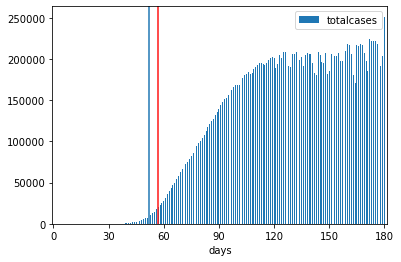

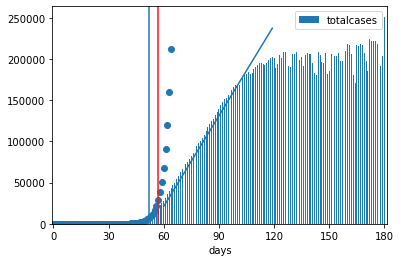

In [363]:
England_df= df[df["country"]== "England"]

Scotland_df= df[df["country"]== "Scotland"]

Wales_df= df[df["country"]== "Wales"]

NI_df= df[df["country"]== "Northern Ireland"]



def get_total(df,d):     # d is the number of days to use to make predictions using the machine learning model 
    
    
    days=[]
    total_cases=[]
    for n in range(182):
        tot= df[df["days"] ==pd.Timedelta(n, unit='d') ].totalcases.sum()
        days.append(n)
        total_cases.append(tot)
    
    new_df= pd.DataFrame({"days": days,"totalcases": total_cases})
    new_df.plot(kind='bar',x='days',y='totalcases', xticks=range(0,182,30), rot=0)
    
    plt.axvline(x=52)
    
    
    """the buffer period has been included to show possible delay in how the measures affected transmission, 
    namely up to 5 days after the lockdown started, 
    the registered cases were still of infections occurred before the lockdown itself"""
    
    plt.axvline(x=57, color='#ff1414') # a buffer period of 10 days has been considered
    
    
    
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    '''MACHINE LEARNING PART WITH SCI-KIT LEARN '''
    
    
    Y_1= new_df[new_df["days"] < 57 ]
    Y_1= Y_1.totalcases
    Y_1= Y_1 + 0.01 # get rid of zeroes
    Y_1= np.log(Y_1)# to make it "fittable" with linear regression 
    
    Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]
    Y_2= Y_2.totalcases
    
    
    'X used to train:'
    
    X_1=np.array(range(57))
    X_2=np.array(range(32))
    
    X_1=X_1.reshape(-1, 1)
    X_2=X_2.reshape(-1, 1)
    
    
    linear_1=LinearRegression()
    linear_2=LinearRegression()
    model_1=linear_1.fit(X_1,Y_1) 
    model_2=linear_2.fit(X_2,Y_2) 
    
    
    'X used to predict:'
    
    X_pred_2= np.array(range(60))
    X_pred_2= X_pred_2.reshape(-1, 1)
    
    X_pred_1= np.array(range(d))
    X_pred_1= X_pred_1.reshape(-1, 1)
    
    
    pred_1=model_1.predict(X_pred_1) #I expect this to be exponential 
    pred_2=model_2.predict(X_pred_2) #I expect this to be linear
    
    ''' END OF THE MACHINE LEARNING PART '''
    ''' END OF THE MACHINE LEARNING PART '''
    
    pred_1= np.exp(pred_1)
    
    
    
    "Same code as before just to duplicate plot"
    new_df.plot(kind='bar',x='days',y='totalcases', xticks=range(0,182,30), rot=0)
    plt.axvline(x=52)
    plt.axvline(x=57, color='#ff1414')
    "END"
    
    plt.scatter(np.array(range(d)),pred_1)
    
    #print(model_2.get_params())
    plt.plot(np.array(range(60,120)),pred_2)
    
    return new_df
    
total_England_df= get_total(England_df, 65)


<ipython-input-347-1a57a89acc89>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


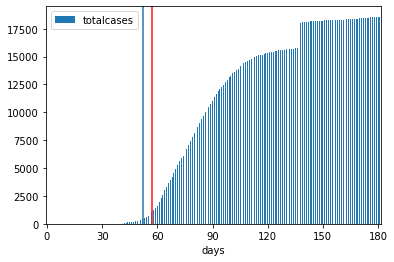

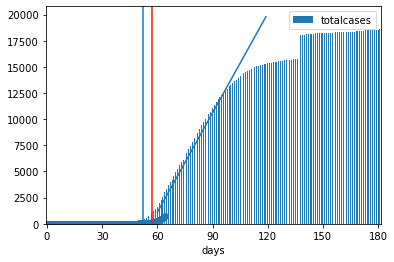

In [350]:
total_Scotland_df= get_total(Scotland_df,65)



<ipython-input-347-1a57a89acc89>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


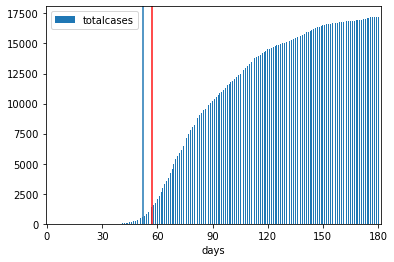

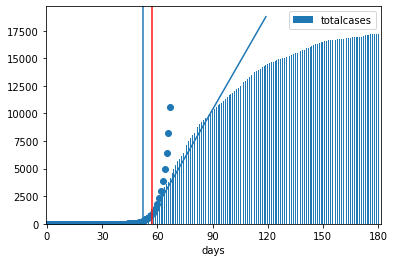

In [352]:
total_Wales_df= get_total(Wales_df, 68)



<ipython-input-338-445e17944fa8>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


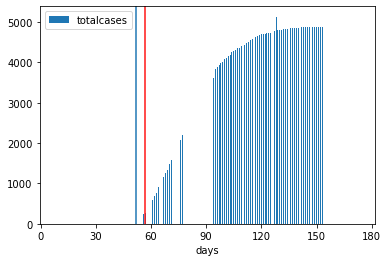

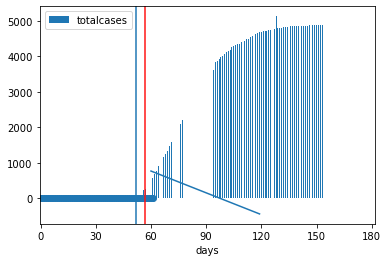

In [341]:
total_NI_df= get_total(NI_df)



<ipython-input-363-60769bac4ae3>:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Y_2= new_df[new_df["days"] < 90 ][new_df["days"] > 57 ]


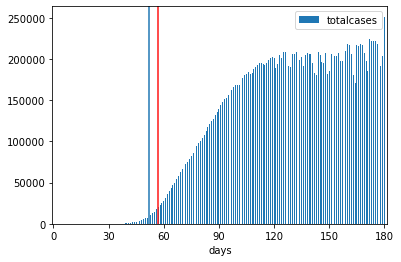

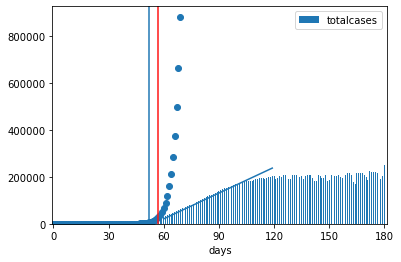

In [364]:
total_England_df= get_total(England_df, 70)  #let´s check the exponential progression at day 70 

According to the model, more than the current total amount of cases in the whole of the UK would have been reached on day 70, which corresponds to the 9th of April 2020 if the virus kept spreading exponentially. Obviously immunity and other factors would have slowed down the spread if compared to the beginning of the pandemic and **it is important to note that data at the beginning of the pandemic were highly unrealiable due to the small number of tests!!**